<a href="https://colab.research.google.com/github/kv1441/LR4/blob/main/LR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/МО/tmdb_5000_movies.csv')
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
factorization_table = {}

df = df[["title", "budget", "popularity", "release_date", "revenue", "runtime", "vote_average", "vote_count"]]
df.head()

,title,budget,popularity,release_date,revenue,runtime,vote_average,vote_count
0,Avatar,237000000,150.437577,2009-12-10,2787965087,162.0,7.2,11800
1,Pirates of the Caribbean: At World's End,300000000,139.082615,2007-05-19,961000000,169.0,6.9,4500
2,Spectre,245000000,107.376788,2015-10-26,880674609,148.0,6.3,4466
3,The Dark Knight Rises,250000000,112.312950,2012-07-16,1084939099,165.0,7.6,9106
4,John Carter,260000000,43.926995,2012-03-07,284139100,132.0,6.1,2124


In [ ]:
# Проверка наличия отсутствующих значений в каждом столбце
missing_values = df.isnull().sum()

# Вывод столбцов с отсутствующими значениями
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

release_date    1
runtime         2
dtype: int64


In [ ]:
# Заполнение пропущенных значений в столбце "Дата" определенным значением
fill_value = pd.to_datetime('2024-01-01')  # Здесь указывается желаемое значение для заполнения пропущенных дат
df['release_date'] = df['release_date'].fillna(fill_value)
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].dt.year.astype(int)
df = df.fillna(df.mean())

for column in df.columns:
  if column == 'original_language':
    df[column], table = pd.factorize(df[column])
    factorization_table[column] = pd.DataFrame(columns=[column], data=table)

df.rename(columns = {'release_date' : 'release_year'}, inplace = True)
df.index = [index for index in range(len(df))]
df.head()

<ipython-input-6-3754d1f8d04c>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,title,budget,popularity,release_year,revenue,runtime,vote_average,vote_count
0,Avatar,237000000,150.437577,2009,2787965087,162.0,7.2,11800
1,Pirates of the Caribbean: At World's End,300000000,139.082615,2007,961000000,169.0,6.9,4500
2,Spectre,245000000,107.376788,2015,880674609,148.0,6.3,4466
3,The Dark Knight Rises,250000000,112.312950,2012,1084939099,165.0,7.6,9106
4,John Carter,260000000,43.926995,2012,284139100,132.0,6.1,2124


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

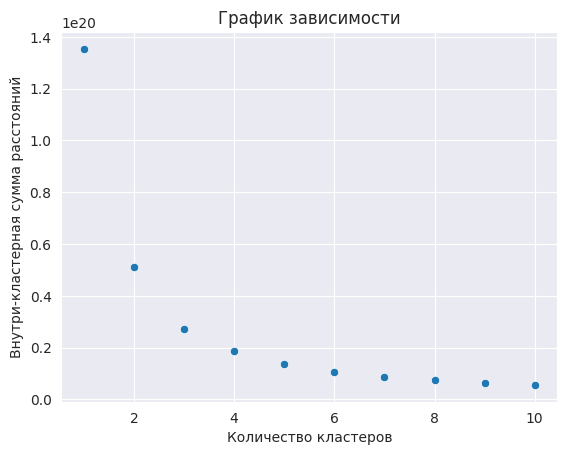

In [ ]:
inertia = []

for i in range(1, 11):
  k_means = KMeans(n_clusters=i, init= 'k-means++')
  k_means.fit(df.drop("title", axis=1))
  inertia.append(k_means.inertia_)

sns.set_style('darkgrid')
sns.scatterplot(x=[x for x in range(1, 11)], y=inertia,)

plt.title('График зависимости')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутри-кластерная сумма расстояний')

In [ ]:
CLUSTERS = 4
model = KMeans(n_clusters=CLUSTERS)
model.fit(df.drop('title', axis=1,))
clusters = pd.DataFrame(columns=df.columns.drop('title'), data=model.cluster_centers_)
clusters["Amount"] = np.unique(model.labels_, return_counts=True)[1]
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,budget,popularity,release_year,revenue,runtime,vote_average,vote_count,Amount
0,1.377992e+07,12.043244,2001.821226,1.666064e+07,103.961905,5.962401,275.223042,3522
1,1.020409e+08,62.808395,2004.600000,4.144602e+08,117.133333,6.633333,2834.628070,285
2,1.608631e+08,127.456421,2008.702381,9.354739e+08,132.488095,6.950000,5555.285714,84
3,5.313049e+07,35.363072,2003.757143,1.534998e+08,112.583516,6.346044,1176.613187,912
